# Train Simple Image Classifier

Task: Train a simple image classifier using logistic regression and cross-entropy loss

## Setup

In [1]:
try:
    import fastai
except ImportError:
    print("installing fastai...")
    !pip install -Uqq fastai

import torch
from fastai.vision.all import *
# Input tensors get tagged as `TensorImageBW`, and they keep that tag even after going through the model.
# I'm not sure how you're supposed to drop that tag, but this works around a type dispatch error.
TensorImageBW.register_func(F.cross_entropy, TensorImageBW, TensorCategory)

import sys
if sys.platform == "darwin":
    # https://stackoverflow.com/a/64855500/69707
    import os
    os.environ['OMP_NUM_THREADS'] = '1'
    
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
torch.manual_seed(34);

### Load the lanterns

In [3]:
path = Path('/kaggle/input/bitmap-files/lantern.npy')
lanterns = np.load(path)

In [4]:
lanterns.shape

(149912, 784)

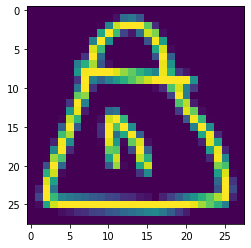

In [5]:
lantern1 = (lanterns[0]).reshape(28,28)
plt.imshow(lantern1);

Create the `dataloaders`. We need a slightly special `ImageBlock` because we want grayscale images.

In [6]:
indices = torch.randperm(len(lanterns))[:750]
lantern_items = lanterns[indices]

In [7]:
lantern_items

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
os.makedirs('/kaggle/working/lanterns')
indice = 0
for image in lantern_items:
    item = image.reshape(28,28)
    i = Image.fromarray(item)
    i.save("/kaggle/working/lanterns/lantern{}.png".format(indice))
    indice += 1

In [9]:
lantern_files = get_image_files("/kaggle/working/lanterns").sorted()

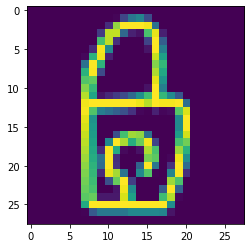

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(lantern_files[0])
imgplot = plt.imshow(img)
plt.show()

### Load the monkeys

In [11]:
path = Path('/kaggle/input/bitmap-files/monkey.npy')
monkeys = np.load(path)

In [12]:
monkeys.shape

(127633, 784)

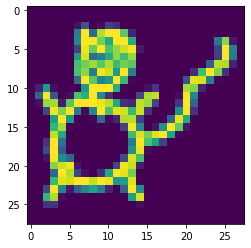

In [13]:
monkey1 = (monkeys[0]).reshape(28,28)
plt.imshow(monkey1);

In [14]:
indices = torch.randperm(len(monkeys))[:750]
monkey_items = monkeys[indices]

In [15]:
os.makedirs('/kaggle/working/monkeys')
indice = 0
for image in monkey_items:
    item = image.reshape(28,28)
    i = Image.fromarray(item)
    i.save("/kaggle/working/monkeys/monkey{}.png".format(indice))
    indice += 1

In [16]:
monkey_files = get_image_files("/kaggle/working/monkeys").sorted()

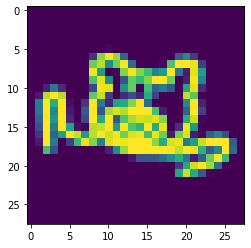

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(monkey_files[0])
imgplot = plt.imshow(img)
plt.show()

### Load the swords

In [18]:
path = Path('/kaggle/input/bitmap-files/sword.npy')
swords = np.load(path)

In [19]:
swords.shape

(123802, 784)

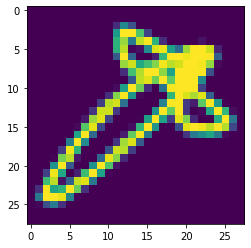

In [20]:
sword1 = (swords[0]).reshape(28,28)
plt.imshow(sword1);

In [21]:
indices = torch.randperm(len(swords))[:750]
sword_items = swords[indices]

In [22]:
os.makedirs('/kaggle/working/swords')
indice = 0
for image in sword_items:
    item = image.reshape(28,28)
    i = Image.fromarray(item)
    i.save("/kaggle/working/swords/sword{}.png".format(indice))
    indice += 1

In [23]:
sword_files = get_image_files("/kaggle/working/swords").sorted()

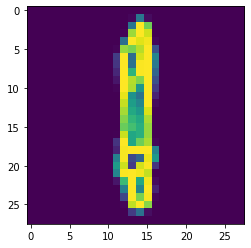

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(sword_files[0])
imgplot = plt.imshow(img)
plt.show()

### Load up the strawberries

In [25]:
path = Path('/kaggle/input/bitmap-files/strawberry.npy')
strawberries = np.load(path)

In [26]:
strawberries.shape

(122301, 784)

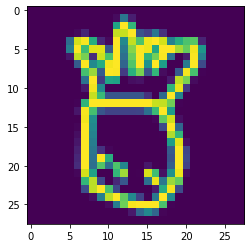

In [27]:
strawberry1 = (strawberries[0]).reshape(28,28)
plt.imshow(strawberry1);

In [28]:
indices = torch.randperm(len(strawberries))[:750]
strawberry_items = strawberries[indices]

In [29]:
os.makedirs('/kaggle/working/strawberries')
indice = 0
for image in strawberry_items:
    item = image.reshape(28,28)
    i = Image.fromarray(item)
    i.save("/kaggle/working/strawberries/strawberry{}.png".format(indice))
    indice += 1

In [30]:
strawberry_files = get_image_files("/kaggle/working/strawberries").sorted()

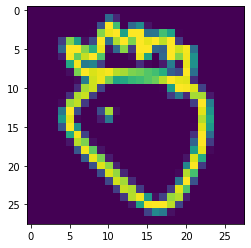

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(strawberry_files[0])
imgplot = plt.imshow(img)
plt.show()

### Load up the cameras

In [32]:
path = Path('/kaggle/input/bitmap-files/camera.npy')
cameras = np.load(path)

In [33]:
cameras.shape

(128772, 784)

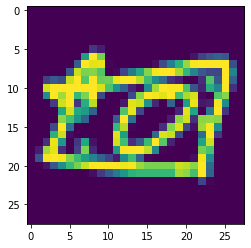

In [34]:
camera1 = (cameras[0]).reshape(28,28)
plt.imshow(camera1);

In [35]:
indices = torch.randperm(len(cameras))[:750]
camera_items = cameras[indices]

In [36]:
os.makedirs('/kaggle/working/cameras')
indice = 0
for image in camera_items:
    item = image.reshape(28,28)
    i = Image.fromarray(item)
    i.save("/kaggle/working/cameras/camera{}.png".format(indice))
    indice += 1

In [37]:
camera_files = get_image_files("/kaggle/working/cameras").sorted()

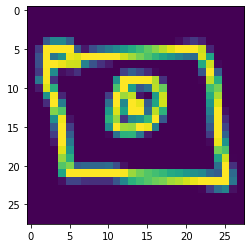

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(camera_files[0])
imgplot = plt.imshow(img)
plt.show()

### Create the array

In [39]:
image_files = lantern_files + monkey_files + sword_files + camera_files + strawberry_files

In [40]:
image_files

(#3750) [Path('/kaggle/working/lanterns/lantern0.png'),Path('/kaggle/working/lanterns/lantern1.png'),Path('/kaggle/working/lanterns/lantern10.png'),Path('/kaggle/working/lanterns/lantern100.png'),Path('/kaggle/working/lanterns/lantern101.png'),Path('/kaggle/working/lanterns/lantern102.png'),Path('/kaggle/working/lanterns/lantern103.png'),Path('/kaggle/working/lanterns/lantern104.png'),Path('/kaggle/working/lanterns/lantern105.png'),Path('/kaggle/working/lanterns/lantern106.png')...]

In [41]:
def get_label(filename):
    if filename[0:3] == 'lan':
        return 'lantern'
    elif filename[0:3] == 'mon':
        return 'monkey'
    elif filename[0:3] == 'swo':
        return 'sword'
    elif filename[0:3] == 'cam':
        return 'camera'
    elif filename[0:3] == 'str':
        return 'strawberry'

In [42]:
labels = []
for path in image_files:
    labels.append(get_label(path.name))

In [43]:
len(labels)

3750

In [44]:
dataset_path = Path('kaggle/working')

Let's inspect a batch of data.

In [45]:
dataloaders = ImageDataLoaders.from_lists(
    # What images to use:
    path=dataset_path, fnames=image_files, labels=labels,

    # train-test split parameters:
    # - amount to hold out for validation:
    valid_pct=0.2,
    # - set the seed used for the train-test split (not the training)
    seed=15, 

    # Set batch size
    bs=16,
)

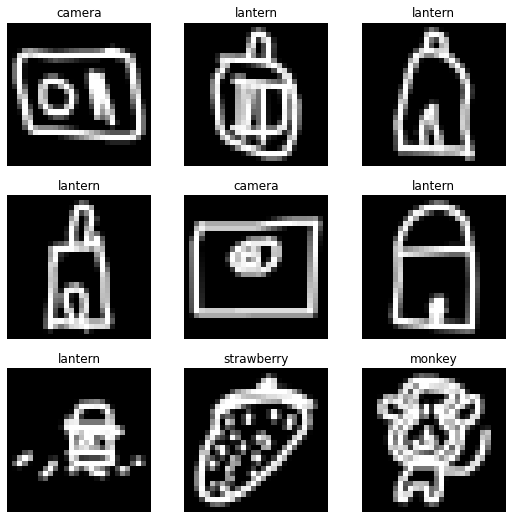

In [46]:
dataloaders.train.show_batch()

In [47]:
print(f"Available categories: {dataloaders.train.vocab}")

Available categories: ['camera', 'lantern', 'monkey', 'strawberry', 'sword']


In [48]:
print(dataloaders.train.n, "training images")
print(dataloaders.valid.n, "validation images")

3000 training images
750 validation images


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.343860,1.028144,0.713333,0.286667,00:14


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.902166,0.718316,0.777333,0.222667,00:10
1,0.707187,0.607276,0.818667,0.181333,00:10
2,0.589890,0.487471,0.840000,0.160000,00:09
3,0.492392,0.478357,0.853333,0.146667,00:10
4,0.438410,0.418692,0.889333,0.110667,00:10
5,0.355588,0.466974,0.865333,0.134667,00:09
6,0.379655,0.295381,0.914667,0.085333,00:09
7,0.260839,0.292246,0.894667,0.105333,00:10
8,0.241763,0.302743,0.913333,0.086667,00:09
9,0.191395,0.316013,0.909333,0.090667,00:09


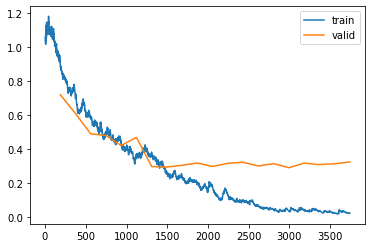

In [49]:
# fastai-specific
learn = vision_learner(
    dls=dataloaders,
    arch=resnet34,
    metrics=[accuracy, error_rate]
)
learn.fine_tune(epochs=20)
learn.recorder.plot_loss()

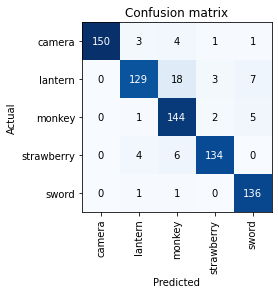

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()